# **Classification of 90 Different Faces of Animals**

## Reading the data from the dataset

In [1]:
#Importing libraries
import cv2
import glob
import os
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from pathlib import Path
from sklearn.model_selection import train_test_split
from PIL import Image

2024-03-03 18:21:33.611550: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 18:21:33.611819: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 18:21:33.813309: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#List of animal names
f = open("/kaggle/input/animal-image-dataset-90-different-animals/name of the animals.txt","r")
names_list = f.read().split("/n")[0].split("\n")
print("List of animals:")
for name in names_list:
    print(name)

List of animals:
antelope
badger
bat
bear
bee
beetle
bison
boar
butterfly
cat
caterpillar
chimpanzee
cockroach
cow
coyote
crab
crow
deer
dog
dolphin
donkey
dragonfly
duck
eagle
elephant
flamingo
fly
fox
goat
goldfish
goose
gorilla
grasshopper
hamster
hare
hedgehog
hippopotamus
hornbill
horse
hummingbird
hyena
jellyfish
kangaroo
koala
ladybugs
leopard
lion
lizard
lobster
mosquito
moth
mouse
octopus
okapi
orangutan
otter
owl
ox
oyster
panda
parrot
pelecaniformes
penguin
pig
pigeon
porcupine
possum
raccoon
rat
reindeer
rhinoceros
sandpiper
seahorse
seal
shark
sheep
snake
sparrow
squid
squirrel
starfish
swan
tiger
turkey
turtle
whale
wolf
wombat
woodpecker
zebra


## Creating a Dataframe using dataset

In [3]:
path = "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals"

data = {"imgpath": [] , "labels": [] }

category = os.listdir(path)
for folder in category:
    folderpath = os.path.join(path , folder)
    filelist = os.listdir(folderpath)
    for file in filelist:
        fpath = os.path.join(folderpath, file)
        data["imgpath"].append(fpath)
        data["labels"].append(folder)
      

df = pd.DataFrame(data) 

## Spliting Dataset into Train & Test

In [4]:
train_df, Temp_df = train_test_split(df, train_size=0.70, shuffle=True, random_state=124)
valid_df , test_df = train_test_split(Temp_df, train_size=0.70, shuffle=True, random_state=124)

#Removing old index columns
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

#Displaying train dataframe
print(train_df[["imgpath", "labels"]].head())

#Checking the shape of dataframe
print(train_df.shape)

                                             imgpath       labels
0  /kaggle/input/animal-image-dataset-90-differen...     elephant
1  /kaggle/input/animal-image-dataset-90-differen...      hamster
2  /kaggle/input/animal-image-dataset-90-differen...  caterpillar
3  /kaggle/input/animal-image-dataset-90-differen...     hedgehog
4  /kaggle/input/animal-image-dataset-90-differen...          rat
(3779, 2)


## Checking Image Data

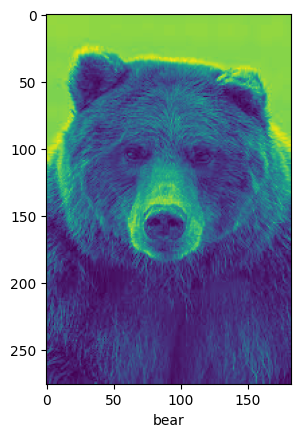

In [5]:
filepath = "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/bear"

for img_path in os.listdir(filepath):
    img = cv2.imread(os.path.join(filepath, img_path), 0)
    plt.imshow(img)
    plt.xlabel(filepath.split("/")[-1])
    plt.show()   
    break

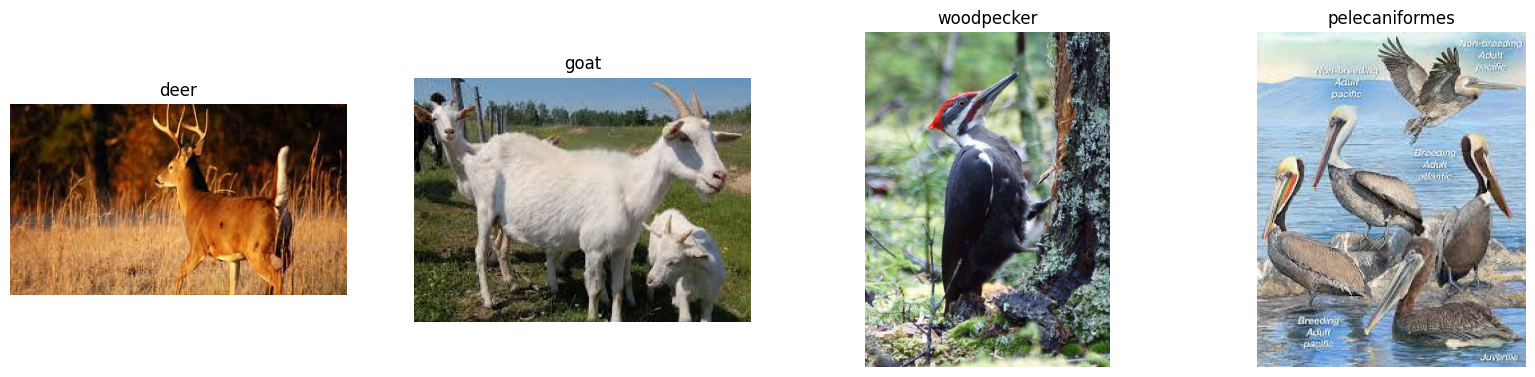

In [6]:
#Defining size of displayed image
plt.figure(figsize=(20,20))

#Displaying images from test dataframe
for i, row in test_df.sample(n=4).reset_index().iterrows():
    plt.subplot(4,4,i+1)
    image_path = row['imgpath']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(row["labels"])
    plt.axis('off')
plt.show()

## Defining Datagens

In [7]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    vertical_flip = True,
    validation_split = 0.2
)


train_df = train_datagen.flow_from_directory(
    "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals",
    target_size = (256, 256) ,
    color_mode = "grayscale"
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    vertical_flip = True,
)

validation_generator = test_datagen.flow_from_directory(
        "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals",
        target_size = (256, 256) ,
        color_mode = "grayscale"
)

Found 5400 images belonging to 90 classes.
Found 5400 images belonging to 90 classes.


In [8]:
# model.fit(
#         train_generator,
#         steps_per_epoch=2000,
#         epochs=50,
#         validation_data=validation_generator,
#         validation_steps=800
# )